In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from surprise import SVD
from surprise import Reader
from surprise import Dataset
from surprise import accuracy

from sklearn.model_selection import train_test_split

%matplotlib inline

# SR por factorización (Laboratorio 3)

En este laboratorio se ajustará un modelo de factorización utilizando el framework Surprise:
https://surprise.readthedocs.io/en/stable/index.html

## 1. Carga del dataset y división en datos de entrenamiento, validación y prueba

In [2]:
path='data/'

In [3]:
review_df = pd.read_csv( path+'review.csv', sep = ',', engine = 'python' )
business_df=pd.read_csv(path+'business.csv')

In [4]:
review_df.head( 5 )

review_id                 user_id             business_id  \
0  8JFGBuHMoiNDyfcxuWNtrA  smOvOajNG0lS4Pq7d8g4JQ  RZtGWDLCAtuipwaZ-UfjmQ   
1  r2IBPY_E8AE5_GpsqlONyg  IKbjLnfBQtEyVzEu8CuOLg  VJEzpfLs_Jnzgqh5A_FVTg   
2  PPgbLBvi34A6m7bKJfTwhw  3TL6HZ1JrKcNTvGDWKlrow  GyC36Pn0Q1-qHnqXys6yFg   
3  g7MfpJGKQUGowCvIcrB91A  ci7Q6NvXQ8UZrBHusVX18g  V6Om7YZhlRQRU7WfuxHq8Q   
4  mRnYZes0nj4sr8DsE_gWMQ  FuTJWFYm4UKqewaosss1KA  fgTOJRkc703E4XRdcr5zRA   

   stars                 date  \
0      4  2009-10-14 19:57:14   
1      4  2014-04-01 13:05:18   
2      1  2013-12-07 13:17:13   
3      4  2017-07-08 21:23:54   
4      3  2016-01-30 01:59:11   

                                                text  useful  funny  cool  
0  Good food--loved the gnocchi with marinara the...       0      0     0  
1  It was my fiances birthday and he decided he w...       0      0     0  
2  Service and management terrible... After messi...       0      0     0  
3  A wee bit pricey for the portions they serve. ...       1      0     0  
4  Ive come from Cali where boba is very common t...       3      0     0

In [5]:
business_df.head()

business_id                                      name  \
0  xPWfBAXS1s5fw2Qcb8xX7g  Luciana's Mexican Restaurant and Cantina   
1  evxhNYa77dxWZabIpGQCkg                                      Haru   
2  Zdw5rbtAWguwcT9h_X4xRA                     Johnson's Corner Farm   
3  _iHV--nOdqTMbINQtMehzQ                               Char's Thai   
4  Ghn6flCdNlOchzLA29tkjQ                                     Basso   

                    address          city state postal_code   latitude  \
0            3716 E 82nd St  Indianapolis    IN       46240  39.910071   
1  5210 Longley Ln, Ste 500          Reno    NV       89511  39.476296   
2             133 Church Rd       Medford    NJ       08055  39.919560   
3             5039 E 5th St        Tucson    AZ       85711  32.229137   
4          7036 Clayton Ave   Saint Louis    MO       63117  38.633229   

    longitude  stars  review_count  is_open  
0  -86.103308    3.5           216        1  
1 -119.763354    4.0           202        1  
2  -74.851228    3.5           169        1  
3 -110.884848    3.5           209        1  
4  -90.306749    4.0           463        1

In [6]:
conteo_negocios=review_df['business_id'].value_counts().to_frame()

In [7]:
conteo_negocios.columns=['conteo']

In [8]:
conteo_negocios=conteo_negocios.merge(business_df, how='left', right_on='business_id', left_index=True)

In [9]:
conteo_negocios.head(20)

conteo             business_id  \
11053     289  ytynqOUb3hjKeJfRj5Tshw   
185       277  PP3BBaVxZLcJU54uP_wL6Q   
8274      240  iSRTaT9WngzB8JJ2YKJUig   
11259     233  _C7QiQQc47AOEv4PE3Kong   
9077      227  GBTPC53ZrG1ZBY3DT8Mbcw   
13067     226  -QI8Qi8XWH3D8y8ethnajA   
10200     224  GXFMD0Z4jEVZBCsbPf4CTQ   
4848      215  6a4gLLFSgr-Q6CZXDLzBGQ   
13999     203  6Ty-KKWq6hLZYW8DWEHYvg   
2714      195  ac1AeYqs8Z4_e2X5M3if2A   
2526      194  IkY2ticzHEn4QFn8hQLSWg   
8387      192  Eb1XmmLWyt_way5NNZ7-Pw   
7740      182  VaO-VW3e1kARkU9bP1E7Fw   
1650      177  c_4c5rJECZSfNgFj7frwHQ   
3375      169  VQcCL9PiNL_wkGf-uF3fjg   
7448      166  IWHdx0NhDKADkGOgXgOFKQ   
1457      160  oBNrLz4EDhiscSlbOl8uAw   
8771      160  VVH6k9-ycttH3TV_lk5WfQ   
12896     157  sTPueJEwcRDj7ZJmG7okYA   
13658     152  qb28j-FNX1_6xm7u372TZA   

                                                    name  \
11053                            Reading Terminal Market   
185                                 Pat's King of Steaks   
8274                                 Mother's Restaurant   
11259                                 Commander's Palace   
9077                                                Luke   
13067           Philadelphia International Airport - PHL   
10200                 Hattie B’s Hot Chicken - Nashville   
4848                                              Cochon   
13999                                      Pat O'Brien’s   
2714                                        Oceana Grill   
2526                                       Geno's Steaks   
8387   Louis Armstrong New Orleans International Airp...   
7740                     Felix's Restaurant & Oyster Bar   
1650                         Tampa International Airport   
3375                                         Royal House   
7448                                       Tommy DiNic's   
1457                          Ruby Slipper - New Orleans   
8771                           Willie Mae's Scotch House   
12896                                     Jim's South St   
13658                                         Gumbo Shop   

                       address          city state postal_code   latitude  \
11053             51 N 12th St  Philadelphia    PA       19107  39.953341   
185        1237 E Passyunk Ave  Philadelphia    PA       19147  39.933201   
8274            401 Poydras St   New Orleans    LA       70130  29.949057   
11259      1403 Washington Ave   New Orleans    LA       70130  29.928735   
9077     333 Saint Charles Ave   New Orleans    LA       70130  29.950742   
13067       8500 Essington Ave  Philadelphia    PA       19153  39.873074   
10200           112 19th Ave S     Nashville    TN       37203  36.151387   
4848      930 Tchoupitoulas St   New Orleans    LA       70130  29.942280   
13999          718 St Peter St   New Orleans    LA       70116  29.958183   
2714              739 Conti St   New Orleans    LA       70130  29.956231   
2526             1219 S 9th St  Philadelphia    PA       19147  39.933837   
8387     1 Terminal Dr, Kenner        Kenner    LA       70062  29.995874   
7740          739 Iberville St   New Orleans    LA       70130  29.954680   
1650   4100 George J Bean Pkwy         Tampa    FL       33607  27.980774   
3375              441 Royal St   New Orleans    LA       70130  29.956473   
7448              1136 Arch St  Philadelphia    PA       19147  39.953478   
1457           200 Magazine St   New Orleans    LA       70130  29.951025   
8771            2401 St Ann St   New Orleans    LA       70119  29.969195   
12896                 400 S St  Philadelphia    PA       19147  39.941498   
13658          630 St Peter St   New Orleans    LA       70116  29.957709   

       longitude  stars  review_count  is_open  
11053 -75.158855    4.5          5721        1  
185   -75.159266    3.0          4250        1  
8274  -90.067049    3.5          5185        1  
11259 -90.084196    4.5          4876        1  
9077  -90.070416    4

In [10]:
review_df[['stars','date']].describe()

stars
count  133741.000000
mean        3.939144
std         1.040419
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000

<Axes: ylabel='Frequency'>

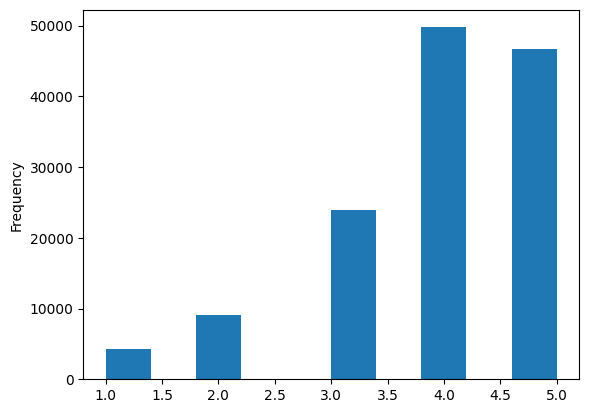

In [11]:
review_df.stars.plot.hist()

### División del dataset de review

In [12]:
from sklearn.model_selection import train_test_split

# First split: train (80%) and temp (20%)
train_df, temp_df = train_test_split(review_df, test_size=0.2, random_state=42)

# Second split: validation (10%) and test (10%)
validation_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [13]:
print( 'Train size: ' + str( train_df.shape ) )
print('Validation size: ' + str( validation_df.shape ) )
print( 'Test size: ' + str( test_df.shape ) )

Train size: (106992, 9)
Validation size: (13374, 9)
Test size: (13375, 9)


In [14]:
# En business queda la información sobre los negocios y su id
business_df.head()

business_id                                      name  \
0  xPWfBAXS1s5fw2Qcb8xX7g  Luciana's Mexican Restaurant and Cantina   
1  evxhNYa77dxWZabIpGQCkg                                      Haru   
2  Zdw5rbtAWguwcT9h_X4xRA                     Johnson's Corner Farm   
3  _iHV--nOdqTMbINQtMehzQ                               Char's Thai   
4  Ghn6flCdNlOchzLA29tkjQ                                     Basso   

                    address          city state postal_code   latitude  \
0            3716 E 82nd St  Indianapolis    IN       46240  39.910071   
1  5210 Longley Ln, Ste 500          Reno    NV       89511  39.476296   
2             133 Church Rd       Medford    NJ       08055  39.919560   
3             5039 E 5th St        Tucson    AZ       85711  32.229137   
4          7036 Clayton Ave   Saint Louis    MO       63117  38.633229   

    longitude  stars  review_count  is_open  
0  -86.103308    3.5           216        1  
1 -119.763354    4.0           202        1  
2  -74.851228    3.5           169        1  
3 -110.884848    3.5           209        1  
4  -90.306749    4.0           463        1

## 2. Transformación de los dataset al formato de Surprise

El framework lee los dataframes de pandas y los transforma a un formato que es aceptado por él

In [15]:
# Se establece el rango en el cual se aceptaran los ratings
reader = Reader( rating_scale = ( 1, 5 ) )

In [16]:
# Transformación de los datasets, puede leer los datasets directamente desde el disco sin necesidad de pasar por pandas
train_data = Dataset.load_from_df( train_df[ [ 'user_id', 'business_id', 'stars' ] ], reader )
validation_data = Dataset.load_from_df( validation_df[ [ 'user_id', 'business_id', 'stars' ] ], reader )
test_data = Dataset.load_from_df( test_df[ [ 'user_id', 'business_id', 'stars' ] ], reader )

In [17]:
# Surprise requiere que explicitamente los datasets sean transformados a datasets de entrenamiento y prueba en cada caso 
# Si bien no se entrenará sobre los datasets de validación y prueba, surprise requiere que sean tranformados a entrenamiento para posteriormente ser transformados a prueba
train_data = train_data.build_full_trainset()
validation_data = validation_data.build_full_trainset()
test_data = test_data.build_full_trainset()

In [18]:
# Finalmente, se convierten los 3 datasets a prueba ya que se medirá el error obtenido en los 3
train_data_2 = train_data.build_testset()
validation_data = validation_data.build_testset()
test_data = test_data.build_testset()

Cada negocio queda representado en el conjunto train con un id interno para los modelos de factorización, revise la documentación sobre ids internos y externos [aqui](https://surprise.readthedocs.io/en/stable/FAQ.html#raw-inner-note)

In [21]:
business_df.loc[business_df.business_id=="xPWfBAXS1s5fw2Qcb8xX7g"]

business_id                                      name  \
0  xPWfBAXS1s5fw2Qcb8xX7g  Luciana's Mexican Restaurant and Cantina   

          address          city state postal_code   latitude  longitude  \
0  3716 E 82nd St  Indianapolis    IN       46240  39.910071 -86.103308   

   stars  review_count  is_open  
0    3.5           216        1

In [ ]:
#Revisar el id interno del negocio con id xPWfBAXS1s5fw2Qcb8xX7g en el dataset
train_data.to_inner_iid("xPWfBAXS1s5fw2Qcb8xX7g")

8672

## 3. Entrenamiento de un modelo SVD con bias

El modelo toma como base el promedio global. En este caso es de 3.94

In [24]:
mean = train_data.global_mean
print( mean )

3.9400422461492446


La clase SVD recibe los siguientes parámetros:
https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD
* n_factors: Número k de factores para realizar la recomendación
* n_epochs: Número de iteraciones a realizar sobre los datos
* biased: Si el modelo contempla los bias o solo la factorización
* lr_all: Tasa de aprendizaje del método
* reg_all: Parámetro de regularización
* init_mean y init_std_dev son los parámetros de la distribución usada para inicializar aleatoriamente los factores

Se prueba un modelo con bias sin regularización para k=5




In [25]:
algo = SVD( n_factors = 5, n_epochs = 200, biased = True, lr_all = 0.001, reg_all = 0, init_mean = 0, init_std_dev = 0.01, verbose = True )

In [26]:
# Se realiza el entrenamiento a partir del dataset debido
algo.fit( train_data )

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
Processing

Al finalizar el entrenamiento, se visualiza cómo quedo la matriz que representa a los usuarios ($p_u$) y la matriz que representa a los items ($q_i$)

In [ ]:
pu = algo.pu

In [28]:
pu.shape

(8843, 5)

<Axes: >

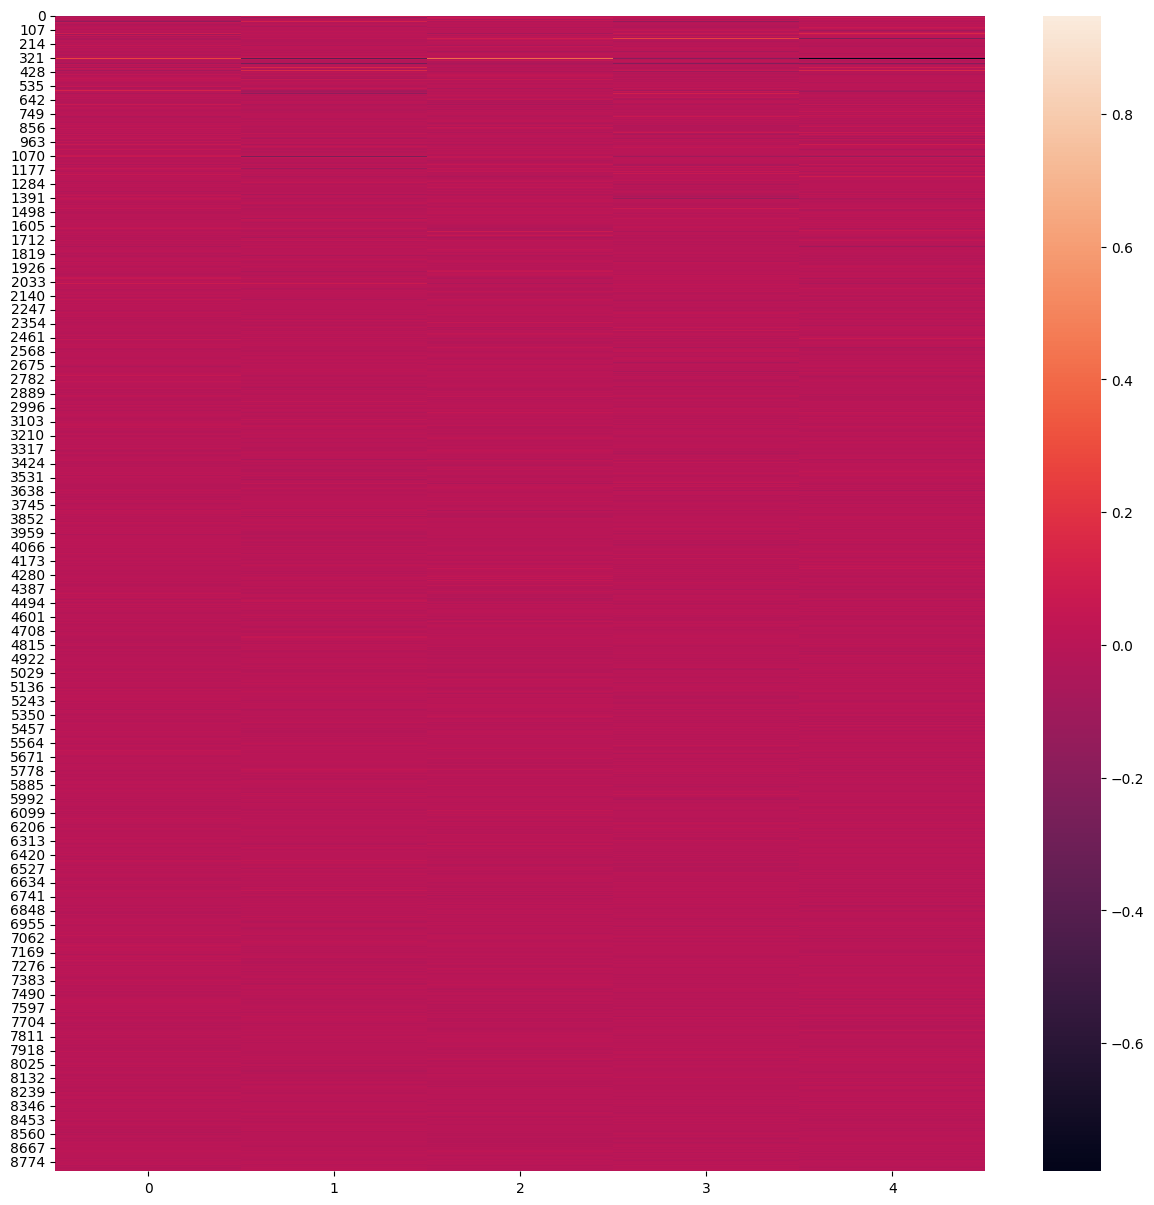

In [29]:
fig, ax =  plt.subplots(figsize=(15,15)) 
sns.heatmap( pu, ax = ax )

In [ ]:
qi = algo.qi

<Axes: >

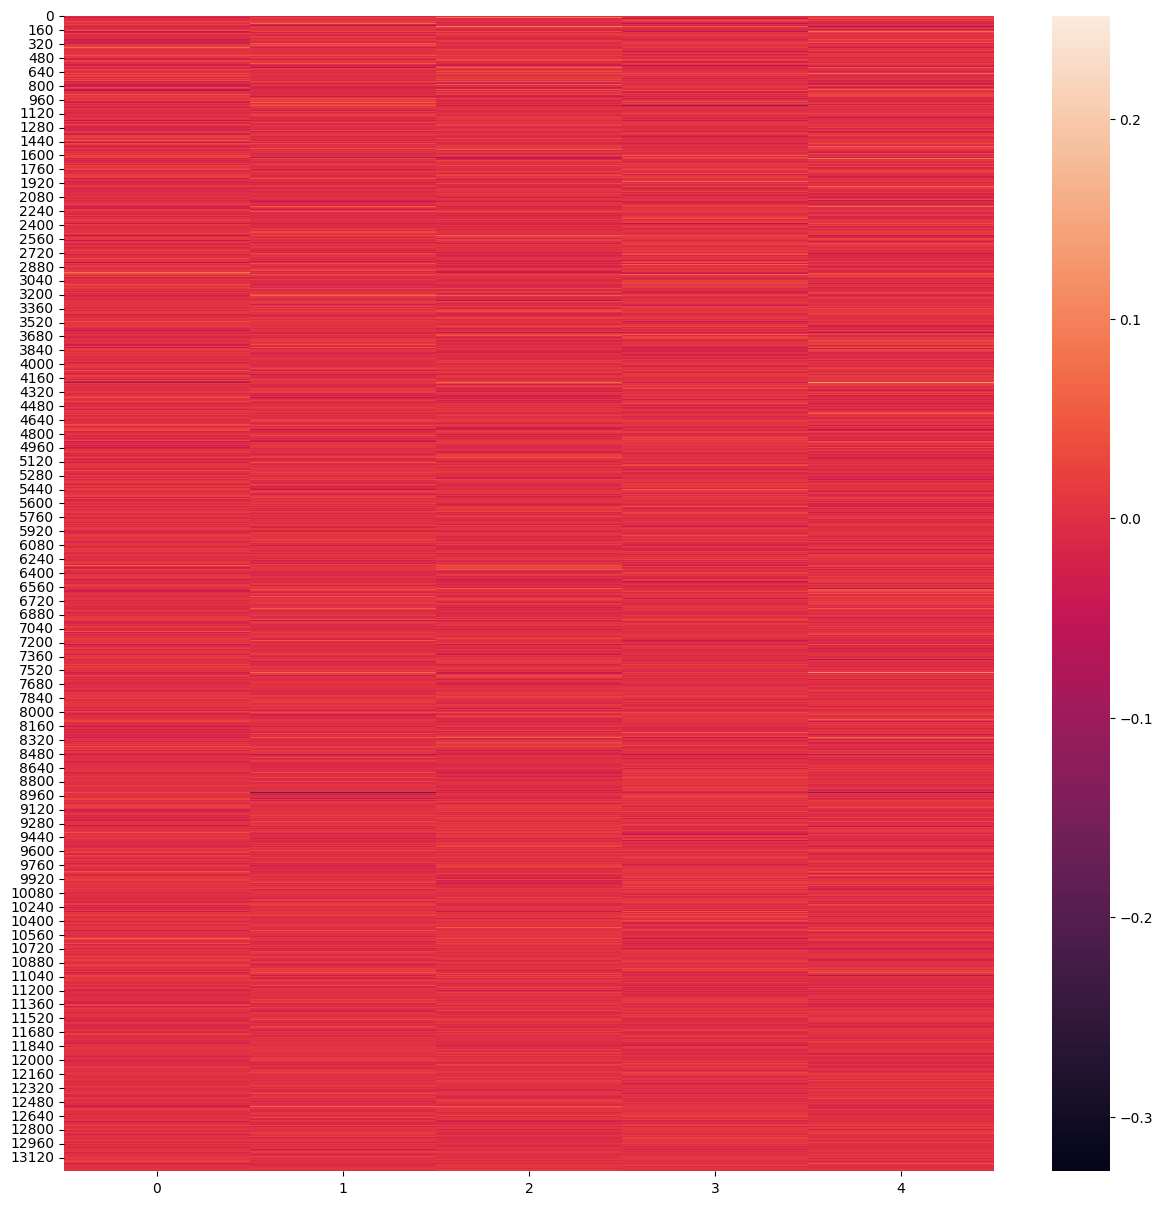

In [31]:
fig, ax =  plt.subplots(figsize=(15,15)) 
sns.heatmap( qi , ax = ax)

También se pueden visualizar los bias de usuarios e items $b_u$ y $b_i$

In [ ]:
bi = algo.bi.reshape( algo.bi.shape[ 0 ], 1 )
bu = algo.bu.reshape( algo.bu.shape[ 0 ], 1 )

<Axes: >

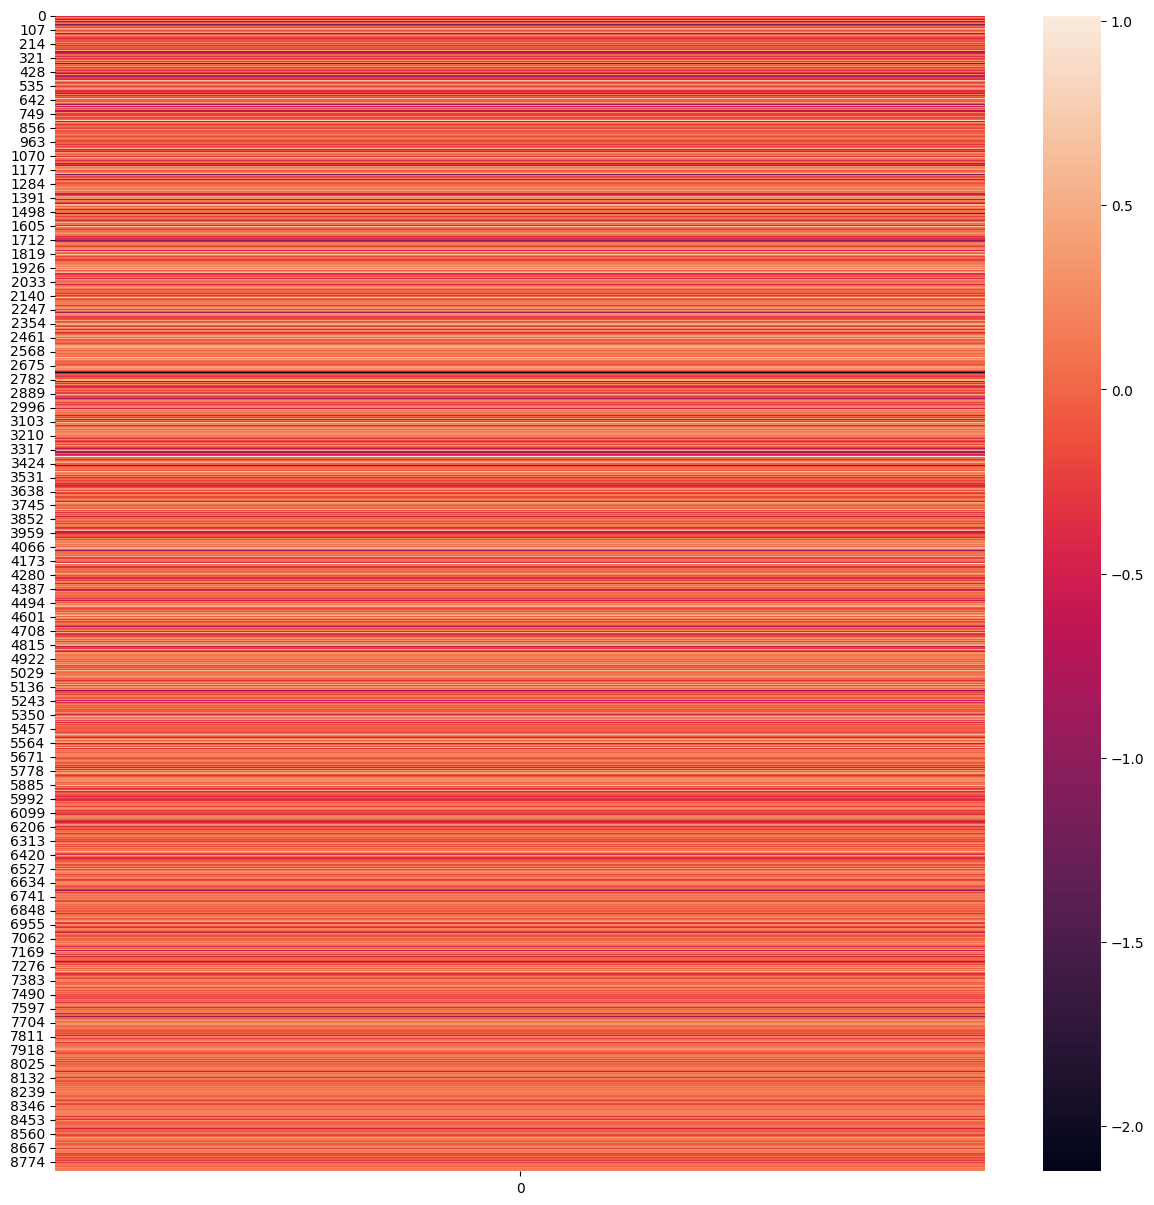

In [33]:
fig, ax =  plt.subplots(figsize=(15,15)) 
sns.heatmap( bu ,ax = ax)

<Axes: >

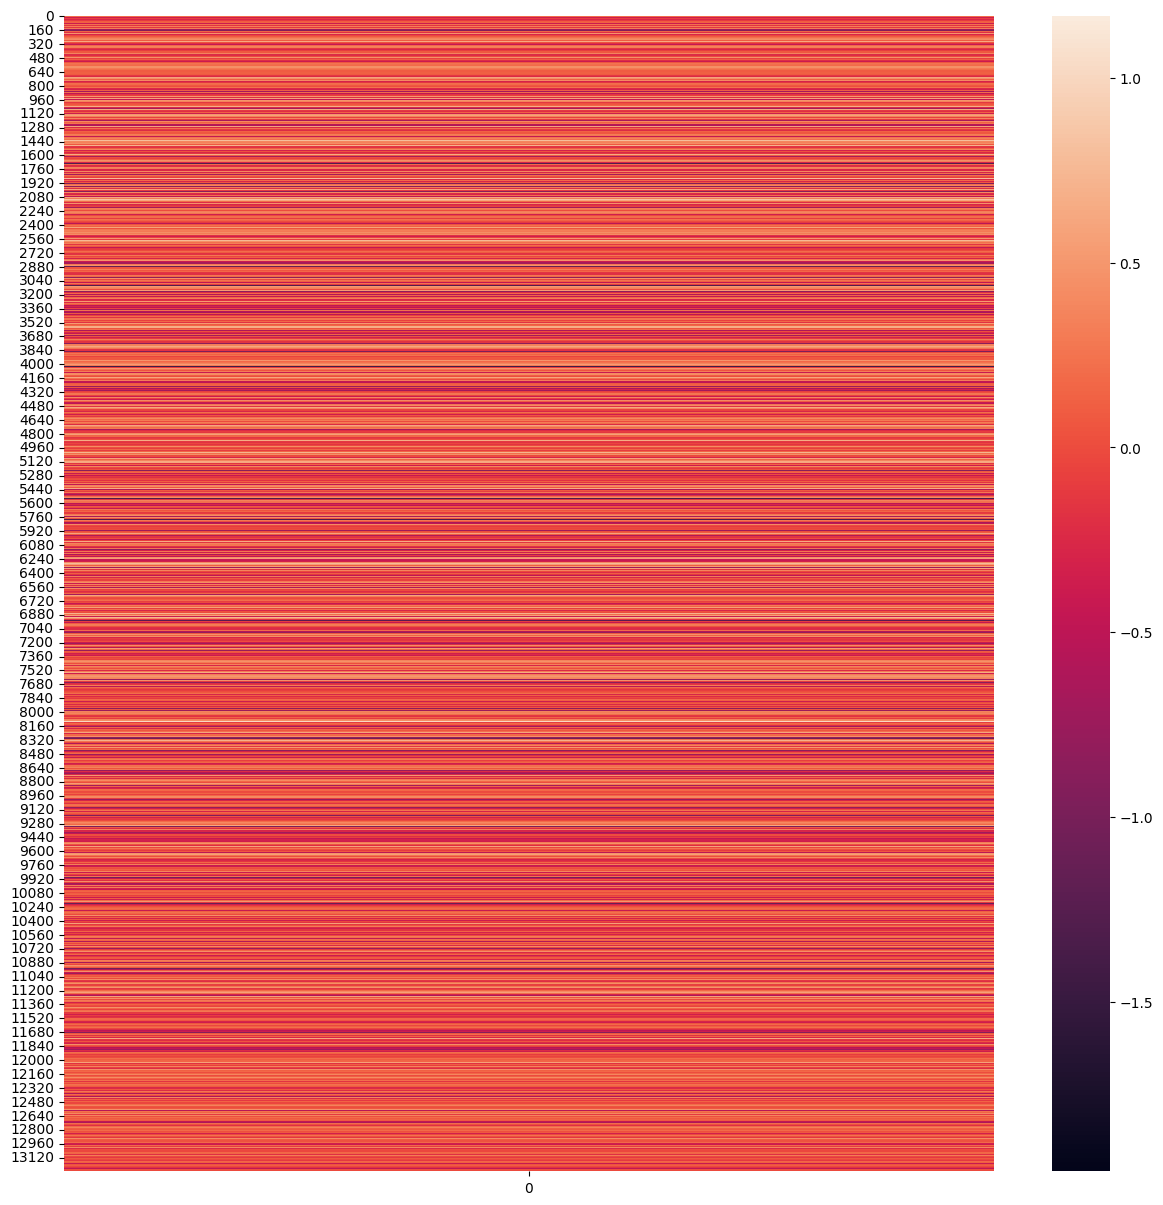

In [34]:
fig, ax =  plt.subplots(figsize=(15,15)) 

sns.heatmap( bi, ax = ax )

In [35]:
bi.shape

(13278, 1)

In [ ]:
# Ejemplo bias del negocio con id xPWfBAXS1s5fw2Qcb8xX7g
bi[train_data.to_inner_iid("xPWfBAXS1s5fw2Qcb8xX7g")]

array([-0.026484])

In [ ]:
#Negocio con el máximo bias
np.amax(bi)

1.1671488375836379

In [38]:
np.where(bi==np.amax(bi))

(array([1174], dtype=int64), array([0], dtype=int64))

In [39]:
bi[591]

array([0.17977678])

In [40]:
train_data.to_raw_iid(591)

'kdJMzQCyG9X07lEgTWWveQ'

In [42]:
conteo_negocios[conteo_negocios.business_id==train_data.to_raw_iid(591)]

conteo             business_id       name        address       city  \
7774      16  kdJMzQCyG9X07lEgTWWveQ  Sun Diner  105 3rd Ave S  Nashville   

     state postal_code  latitude  longitude  stars  review_count  is_open  
7774    TN       37201  36.16122 -86.775873    4.0           460        1

In [44]:
train_df[train_df.business_id==train_data.to_raw_iid(591)]

review_id                 user_id             business_id  \
11010  RyUxPCY4IClRoJn4_VmqMQ  ziYUenaeKLechx8j4P4CDA  kdJMzQCyG9X07lEgTWWveQ   
11084  BxZrpGo-AAeoeim1rJYMaA  BQkC6RneYfvfG6wRe0hsvQ  kdJMzQCyG9X07lEgTWWveQ   
4452   YR1mjHsiP2uTJaQ7cZq3dw  wlkFYIGQveFMi43VHmXeTQ  kdJMzQCyG9X07lEgTWWveQ   
956    DxzUloRhhu0acoS6JJH8tg  Igs1V9jMkjdgNEhQBvE1bQ  kdJMzQCyG9X07lEgTWWveQ   
9128   vL_R4lQwVTSZ_heuRjF_-g  _TKXaTPT2Yu0rRFqYzs44g  kdJMzQCyG9X07lEgTWWveQ   
8725   T6g_h047Rg3J-2YBbBw4cA  OohAgTToKurMlxYEuy7AVQ  kdJMzQCyG9X07lEgTWWveQ   
9232   GBDICT09glN2gIsb5n3JKQ  cQXqlaPmB1CWSU9DXgzBdw  kdJMzQCyG9X07lEgTWWveQ   
12189  8yf_C6Gm02FRit-kQJZsDQ  kfllVjjGGRYbHIYi_w9ZjQ  kdJMzQCyG9X07lEgTWWveQ   
8975   NbDhtaBnv7IkwkK3IUOHww  PeIFSmI0I1ILYjUjjUSZdA  kdJMzQCyG9X07lEgTWWveQ   
7575   EJ2AAhw4IJKeQZ3KCFYXfg  uLBFp9aZaOMnTOIB67DDcA  kdJMzQCyG9X07lEgTWWveQ   
12559  Q4nNu03w67FvNO8lGTpagw  n5gUVvfTc6QlZzjjLUXoZg  kdJMzQCyG9X07lEgTWWveQ   
2429   krYtAzpvj5yMTtHfMvBXgw  lHADMia6cC01NCu0p_ztfQ  kdJMzQCyG9X07lEgTWWveQ   

       stars                 date  \
11010      4  2021-04-04 00:51:04   
11084      4  2019-01-24 23:56:05   
4452       4  2017-03-24 23:41:40   
956        3  2017-05-04 15:56:56   
9128       4  2020-03-02 02:20:29   
8725       4  2021-06-22 14:48:39   
9232       5  2020-12-31 20:06:18   
12189      5  2018-08-12 22:15:14   
8975       4  2018-10-14 15:14:35   
7575       5  2019-08-05 18:38:15   
12559      5  2021-05-23 13:18:37   
2429       3  2018-04-08 03:20:09   

                                                    text  useful  funny  cool  
11010  A great late night dining spot located less th...       1      0     0  
11084  Sun Diner in Nashville is one of the very best...      12      7    11  
4452   If it wasnt for the seating situation I would ...       2      2     3  
956    This place is right off the main tourist drag ...       0      2     0  
9128   With the Nashville Predators and Nashville Soc...       2      1     1  
8725   Really cute diner just off broadway in between...       0      0     0  
9232   Fast and good food. We were starving so decide...       0      0     0  
12189  We went to the Sun Diner for a late breakfast ...       2      0     2  
8975   Quick late late night food near Broadway. We c...       1      0     0  
7575   I  loved this restaurant. The place is small a...       0      0     0  
12559  Perfect little diner just off of Broadway to g...       6      1     4  
2429   Causal and fun diner. Good for breakfast or br...       0      0     0

### Reconstrucción de la matriz original

Una vez se realiza la factorización, se puede reconstruir la predicción para cada una de las coordenadas de la matriz original

$\hat{r}_{ui}= \mu + b_{i} + b_{u} + p_{u}\dot q_{i}^{T} $

In [45]:
reconstruct = ( pu ).dot( ( qi ).T ) + bu + bi.T + mean

<Axes: >

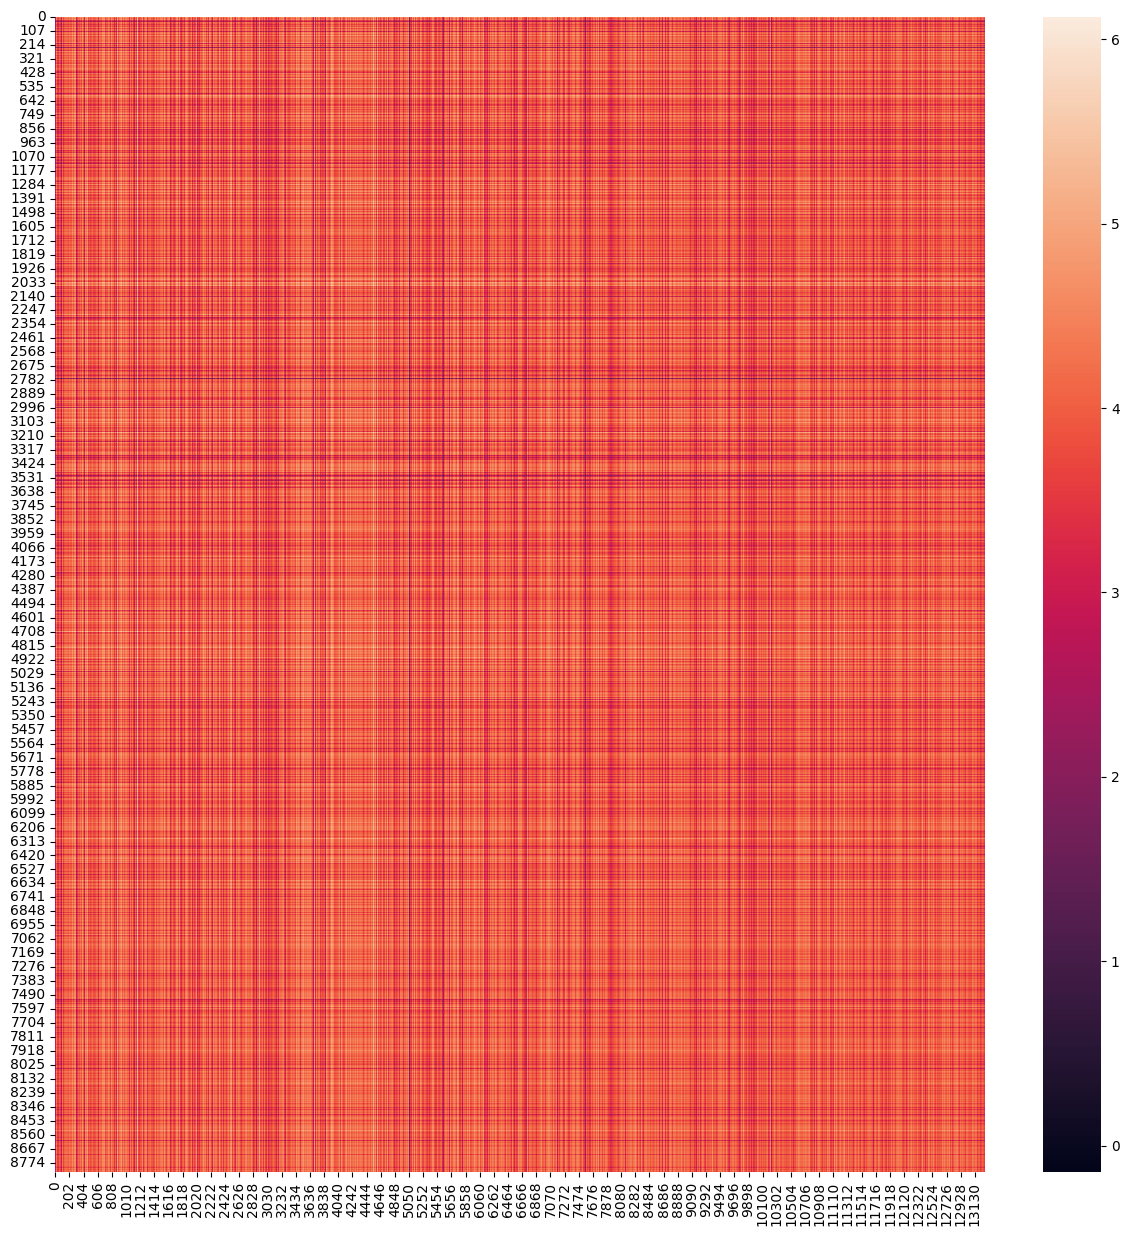

In [46]:
fig, ax =  plt.subplots(figsize=(15,15)) 
sns.heatmap( reconstruct, ax = ax )

<Axes: >

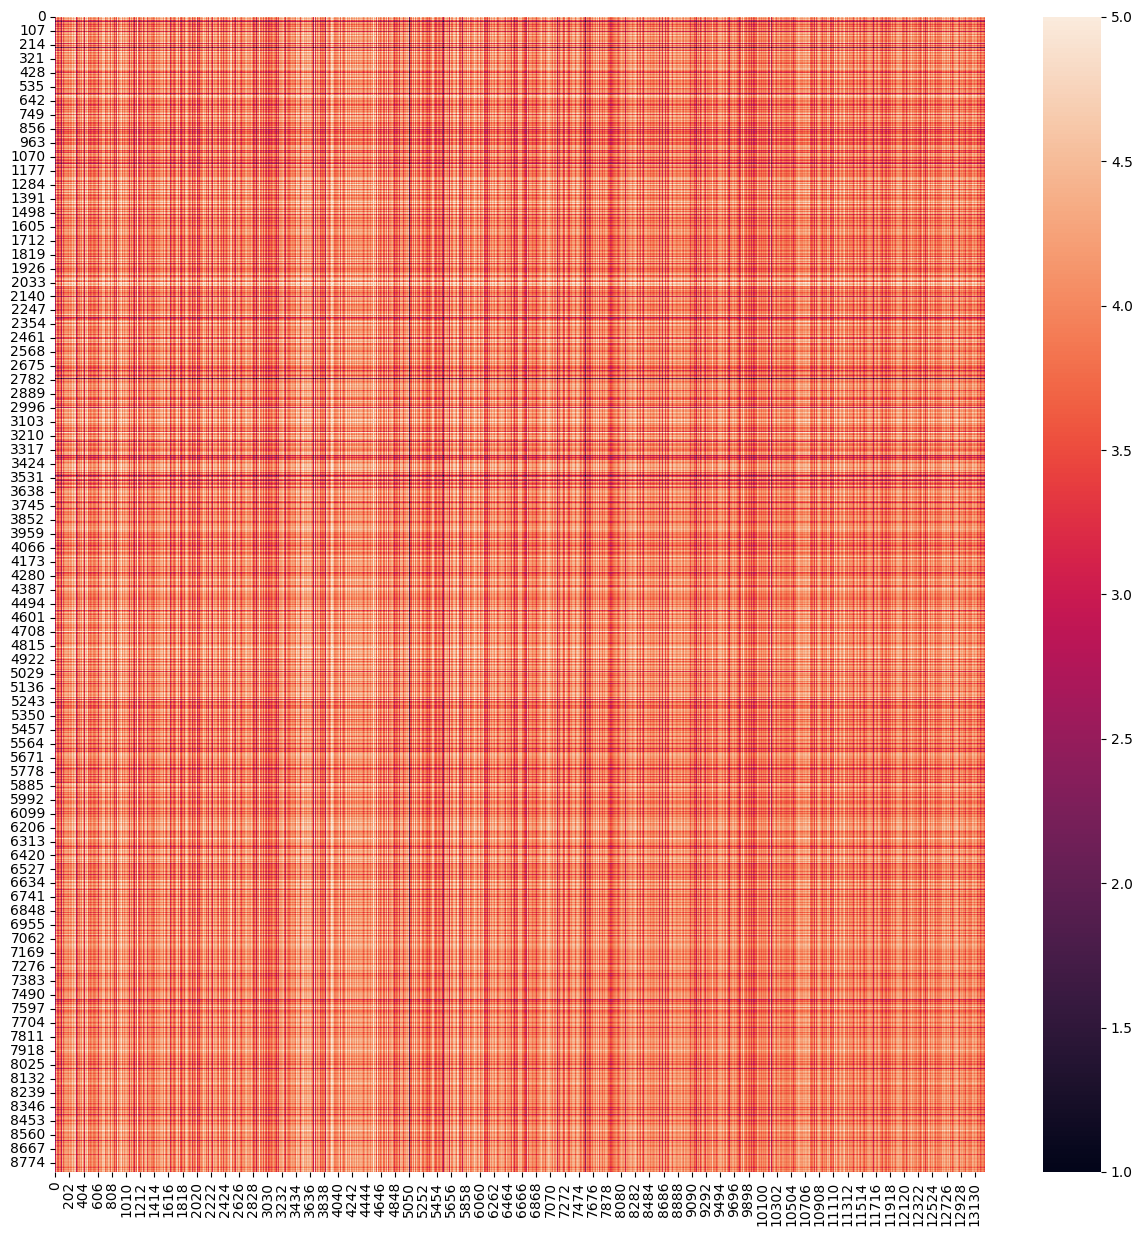

In [49]:
# Ya que algunos ratings reconstruidos están fuera del rango aceptado, se realiza un ajuste entre 1 y 5
reconstruct = np.clip( reconstruct, 1, 5 )
fig, ax =  plt.subplots(figsize=(15,15)) 

sns.heatmap( reconstruct , ax = ax)

Compare los resultados con la matriz original:

In [50]:
original = np.zeros( ( train_data.n_users , train_data.n_items ) )
for ( u, i, r ) in train_data.all_ratings():
    original[ u ][ i ] = r

<Axes: >

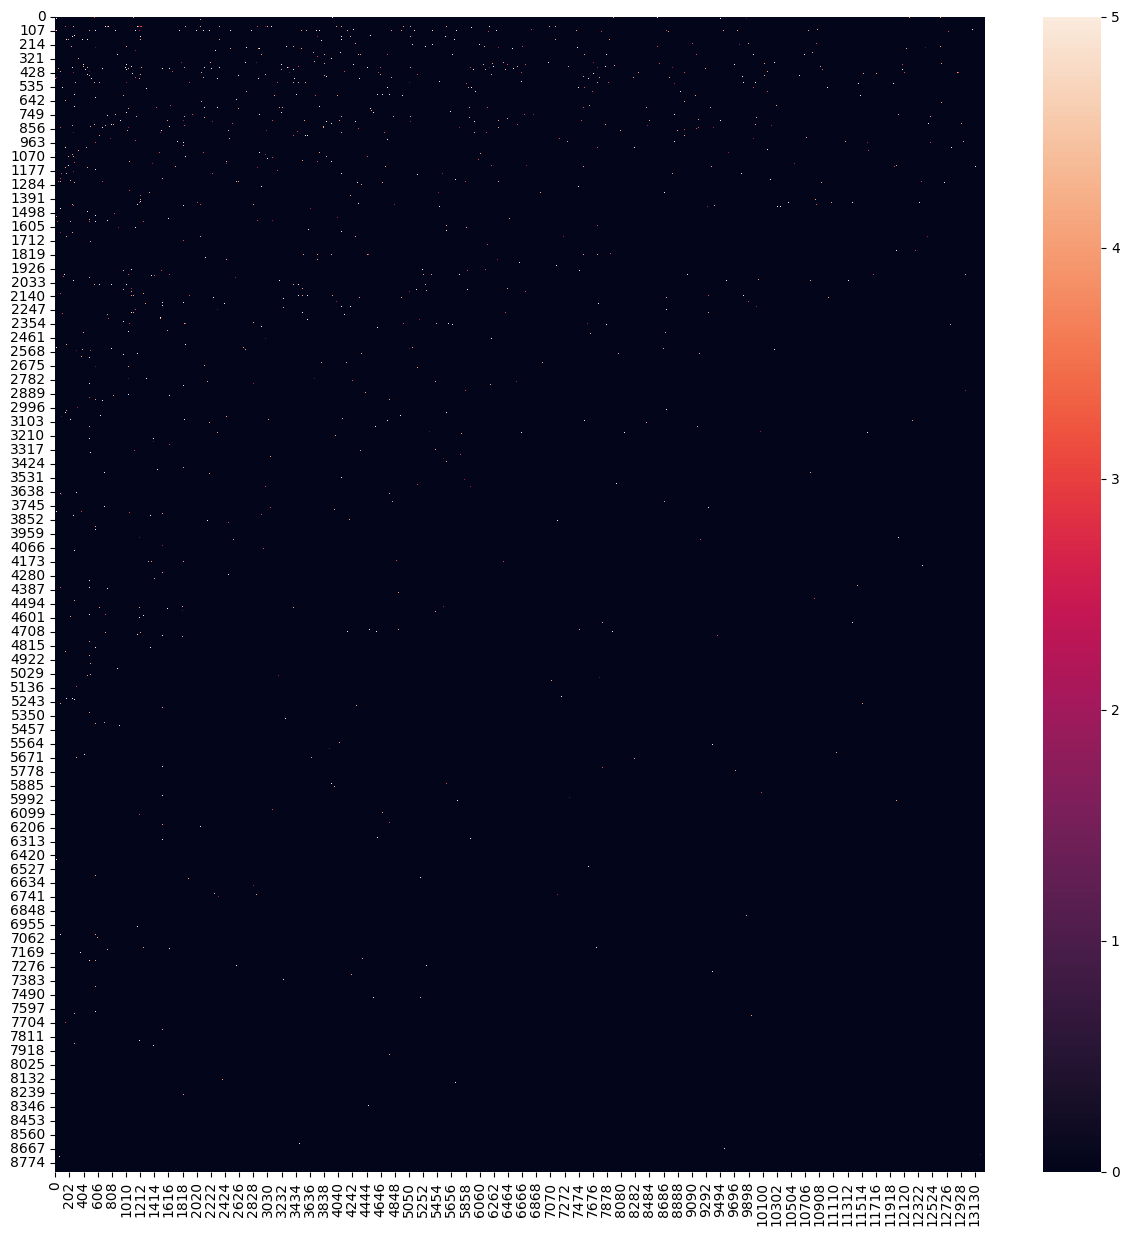

In [51]:
fig, ax =  plt.subplots(figsize=(15,15)) 
sns.heatmap( original, ax = ax )

### Se compara visualmente el error en las entradas conocidas de la matriz ( error en conjunto de entrenamiento )

In [52]:
known_entries = original == 0

In [53]:
reconstruct[ known_entries ] = 0

<Axes: >

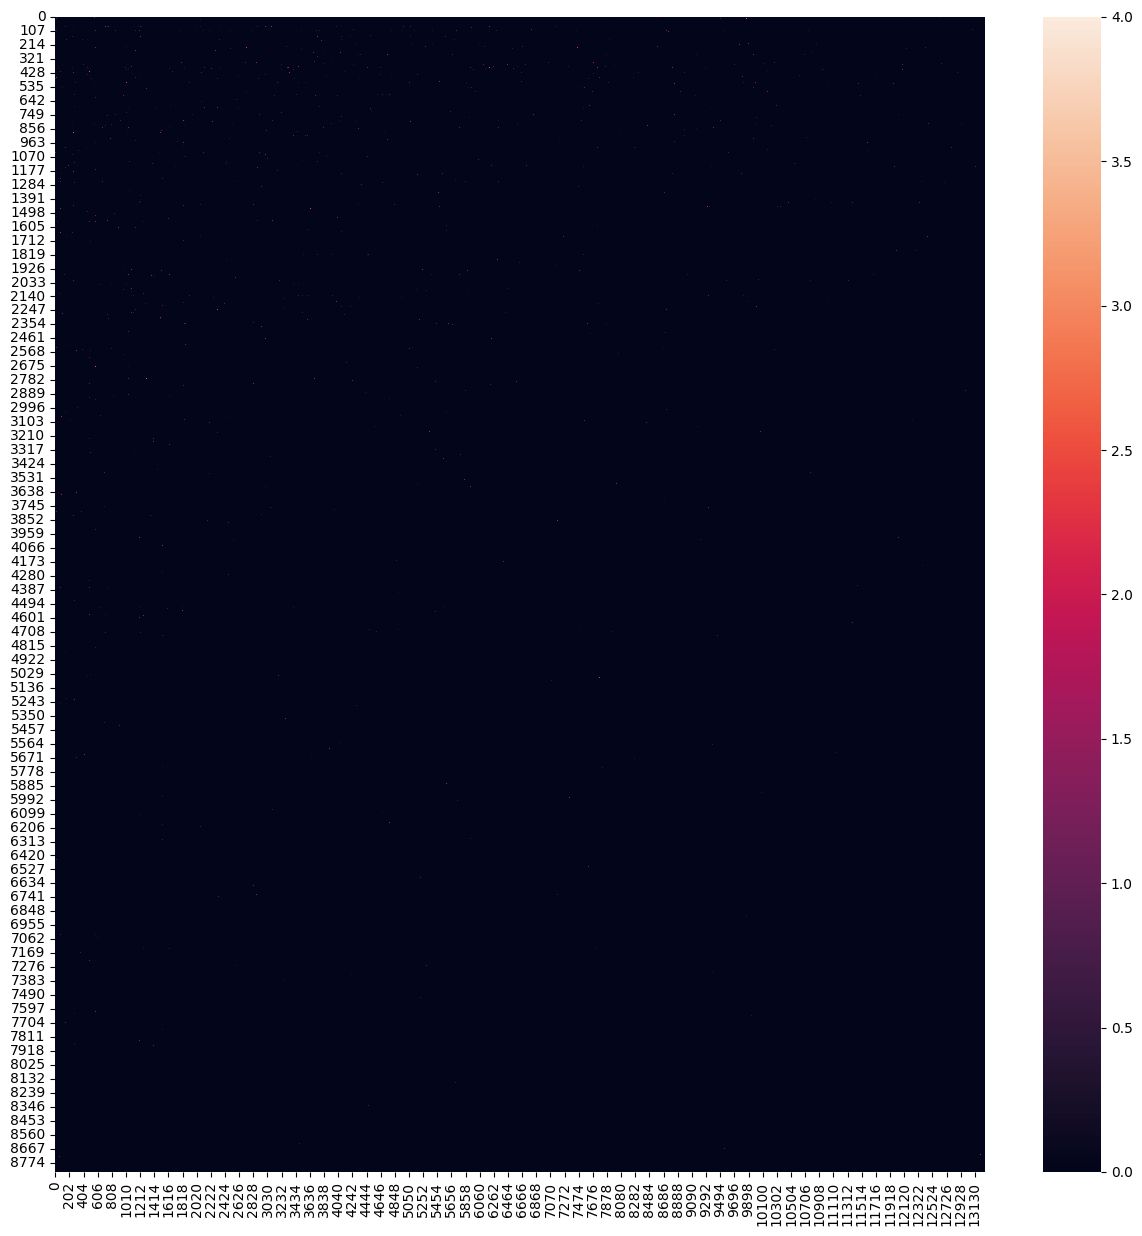

In [54]:
fig, ax =  plt.subplots(figsize=(15,15)) 

sns.heatmap( np.abs( original - reconstruct ) , ax = ax)

## 3. Evaluación de predicciones

A partir del modelo entrenado, se mide el error del modelo en el conjunto de entrenamiento, validación y prueba

In [55]:
predictions_train = algo.test( train_data_2 )

In [56]:
predictions_validation = algo.test( validation_data )
predictions_test = algo.test( test_data )

In [57]:
accuracy.rmse( predictions_train, verbose = True )

RMSE: 0.8309


0.8308585027769801

In [58]:
accuracy.rmse( predictions_validation, verbose = True )

RMSE: 0.9622


0.9621575940217125

In [59]:
accuracy.rmse( predictions_test, verbose = True )

RMSE: 0.9653


0.9652785685839693

## 4. Selección de hiper-parámetros

Utilice este notebook para realizar los siguientes ajustes:

4.1 Aumente el número k de dimensiones del vector y documente los resultados. Evidencie el efecto que tiene esta variación en los parámetros obtenidos y en los errores (cree una gráfica donde muestre el efecto que tiene k sobre los errores)

4.2 Para un k fijo, aumente la regularización para diferentes valores [0.001,0.01,0.1,1,10].  Evidencie el efecto que tiene esta variación en los parámetros obtenidos y en los errores, por ejemplo, comparando los tamaños de los parámetros.

4.3 ¿Según los resultados obtenidos, qué otros hiperparámetros cambiaría y en qué dirección para mejorar el performance del modelo?

In [60]:
from surprise.model_selection.search import GridSearchCV

In [62]:
param_grid = {
    'n_factors': [5, 10, 15,20,30,35,50],
    'n_epochs': [200],
    'lr_all': [0.001],
    'reg_all': [0],
    'init_mean' : [0],
    'init_std_dev':[0.01],
    'verbose':[True],
    'biased':[True]
}


train_data_copy = Dataset.load_from_df( train_df[ [ 'user_id', 'business_id', 'stars' ] ], reader )
validation_data_copy = Dataset.load_from_df( validation_df[ [ 'user_id', 'business_id', 'stars' ] ], reader )
test_data_copy = Dataset.load_from_df( test_df[ [ 'user_id', 'business_id', 'stars' ] ], reader )


# Perform grid search
gs = GridSearchCV(SVD, param_grid, measures=['RMSE'], cv=3)
gs.fit(train_data_copy)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
Processing

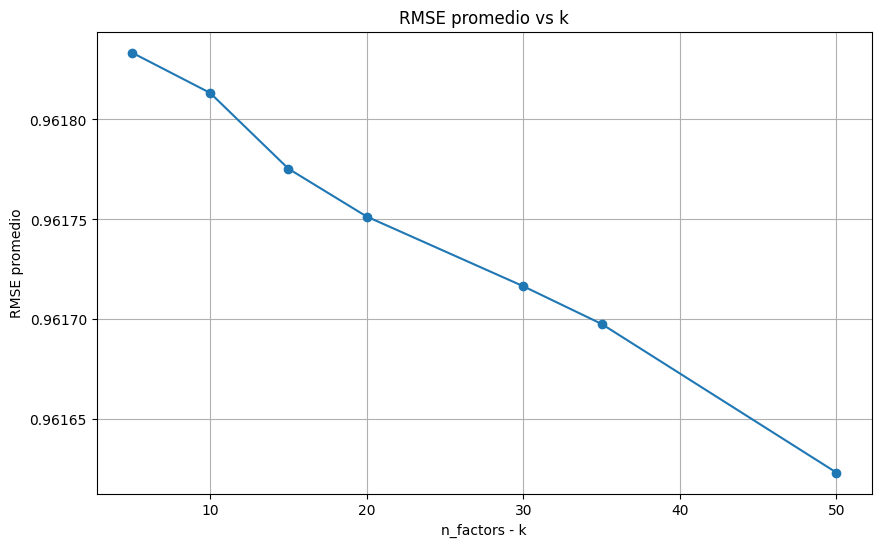

In [63]:
results_df = pd.DataFrame.from_dict(gs.cv_results)

results_df = results_df.sort_values(by='param_n_factors')

plt.figure(figsize=(10,6))
plt.plot(results_df['param_n_factors'], results_df['mean_test_rmse'], marker='o')
plt.title('RMSE promedio vs k')
plt.xlabel('n_factors - k')
plt.ylabel('RMSE promedio')
plt.grid(True)
plt.show()

In [64]:
param_grid_reg = {
    'n_factors': [30], #mejor k!!!!!
    'n_epochs': [200],
    'lr_all': [0.001],
    'reg_all': [0.001,0.01,0.1,1,10],
    'init_mean' : [0],
    'init_std_dev':[0.01],
    'verbose':[True],
    'biased':[True]
}


# Perform grid search
gs_reg = GridSearchCV(SVD, param_grid_reg, measures=['RMSE'], cv=3)
gs_reg.fit(train_data_copy)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
Processing

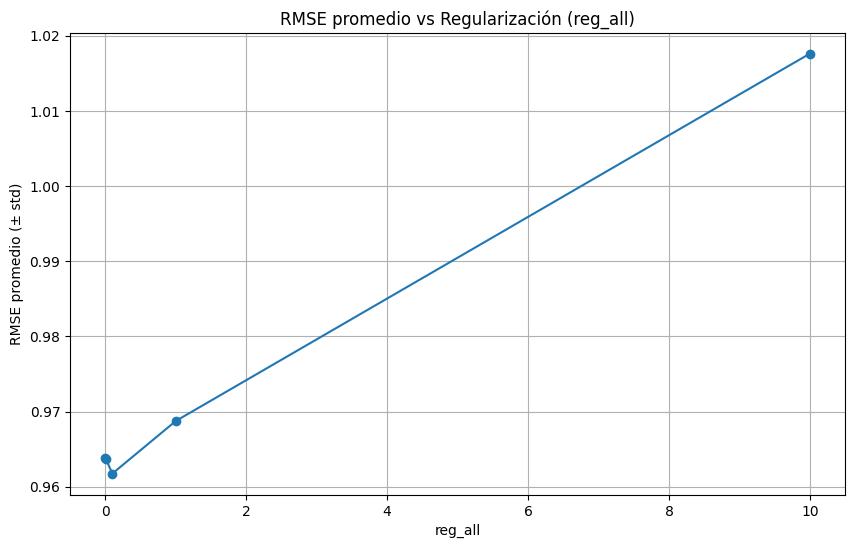

In [65]:
results_reg_df = pd.DataFrame.from_dict(gs_reg.cv_results)

results_reg_df = results_reg_df.sort_values(by='param_reg_all')

plt.figure(figsize=(10,6))
plt.errorbar(results_reg_df['param_reg_all'], results_reg_df['mean_test_rmse'], fmt='-o', capsize=5)
plt.title('RMSE promedio vs Regularización (reg_all)')
plt.xlabel('reg_all')
plt.ylabel('RMSE promedio (± std)')
plt.grid(True)
plt.show()